# 📊 Finance & Subscription Analytics Project — Data and Library Overview
## 🔧 Libraries Used
### 1. %matplotlib inline
####    Purpose: Used in Jupyter notebooks to render plots directly below the code cell.
####    Why: Ensures visualizations are shown inline for immediate feedback and ease of presentation.

### 2. pandas
####    Purpose: High-performance library for data manipulation and analysis.
####    Why: Essential for reading CSV files, handling dataframes, filtering, and summarizing data.

### 3. numpy
####    Purpose: Core library for numerical computing in Python.
####    Why: Useful for handling numerical operations, especially if aggregations or calculations are needed.

### 4. matplotlib.pyplot
####    Purpose: Core plotting library for Python.
####    Why: Offers flexibility in creating all types of static, animated, and interactive plots.

### 5. seaborn
####    Purpose: Statistical data visualization built on top of matplotlib.
####    Why: Enhances visual appeal with themes and easy-to-use interfaces for complex plots.

### 6. matplotlib.gridspec
####    Purpose: Provides a way to lay out subplots in a flexible grid.
####    Why: Helps arrange multiple plots cleanly in one figure.

### 7. matplotlib.patches
####    Purpose: Create shapes like rectangles, circles, polygons on plots.
####    Why: Useful for annotating plots or highlighting specific regions.

In [40]:
# 📦 Import Required Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches

# Apply Seaborn theme
sns.set(style="whitegrid")

# 🧾 Data Loading, Preprocessing, Cleaning, and Merging
## Loads each CSV file into a Pandas DataFrame.
###  These files contain different aspects of the data:
####  1. financial_df: Macroeconomic indicators by quarter.
####  2. client_industry_df: Client details by industry, size, and location.
####  3. payment_df: Historical payment information.
####  4. subscription_df: Subscription type and renewal info.

## Clean and Convert Date Columns
### Converts string date columns to datetime format for accurate time-based operations.
### errors='coerce' ensures any invalid formats are converted to NaT (Not a Time), making it easier to detect and clean.

## Drop Nulls in Key Columns
### Removes rows that are missing essential information:
#### In client_industry_df: Drops if client_id or industry is missing.
#### In subscription_df: Drops if client_id or renewed status is missing.
### This ensures the data is clean and reliable for merging and analysis.


In [43]:
# 📂 Load the CSV data into DataFrames
financial_df = pd.read_csv("finanical_information.csv")
client_industry_df = pd.read_csv("industry_client_details.csv")
payment_df = pd.read_csv("payment_information.csv")
subscription_df = pd.read_csv("subscription_information.csv")

# 🧹 Clean and Convert Date Columns
financial_df['start_date'] = pd.to_datetime(financial_df['start_date'], errors='coerce')
financial_df['end_date'] = pd.to_datetime(financial_df['end_date'], errors='coerce')
subscription_df['end_date'] = pd.to_datetime(subscription_df['end_date'], errors='coerce')
payment_df['payment_date'] = pd.to_datetime(payment_df['payment_date'], errors='coerce')

# Drop nulls in key columns
client_industry_df.dropna(subset=['client_id', 'industry'], inplace=True)
subscription_df.dropna(subset=['client_id', 'renewed'], inplace=True)

# 🔗 Merge subscription and industry details
merged_subscription_df = pd.merge(client_industry_df, subscription_df, on='client_id', how='inner')

# 📊 Q1: Count of Clients by Industry
## We want to analyze how many clients belong to specific industries — particularly:
### Finance Lending
### BlockChain
## This helps us understand the distribution of our client base across key sectors.

## Explanation
### Filtering by Industry:
#### client_industry_df['industry'] == 'Finance Lending' creates a boolean mask for that industry.
#### Same for 'Block Chain'.
### Counting Rows:
#### .shape[0] returns the number of rows matching the filter condition — effectively the number of clients in that industry.
### Printing Results:
#### Uses formatted strings to display a summary of how many clients belong to each category.in`

In [46]:
# 📊 Q1: Count of Clients by Industry
finance_clients_count = client_industry_df[client_industry_df['industry'] == 'Finance Lending'].shape[0]
blockchain_clients_count = client_industry_df[client_industry_df['industry'] == 'Block Chain'].shape[0]

print("📌 Q1: Client Counts")
print(f"Finance Lending Clients: {finance_clients_count}")
print(f"Blockchain Clients: {blockchain_clients_count}")

📌 Q1: Client Counts
Finance Lending Clients: 22
Blockchain Clients: 25


## 📊 Bar Chart: Client Distribution by Industry
#### To visualize the number of clients in each industry (`Finance Lending` and `Block Chain`), we use a **bar chart**. This makes it easy to compare the client distribution across these two key sectors.

## Code Explanation
#### plt.figure(figsize=(6, 4)): Sets the size of the plot.
#### pd.Series({...}): Creates a simple series with industry names as keys and client counts as values.
#### .plot(kind='bar'): Generates a bar plot from the Series.
#### color: Custom colors are assigned for better visual distinction.
#### set_title, set_ylabel, set_xlabel: Adds meaningful titles and axis labels.
#### set_xticklabels: Ensures that industry names are displayed properly.
#### bar_label(...): Annotates each bar with its respective value for clarity.
#### plt.tight_layout(): Adjusts spacing to avoid clipping of labels or titles.

## Sample Output
### You will see a bar chart with two bars:
#### One for Finance Lending
#### One for Block Chain
### Each bar will have a label indicating the exact number of clients.s.

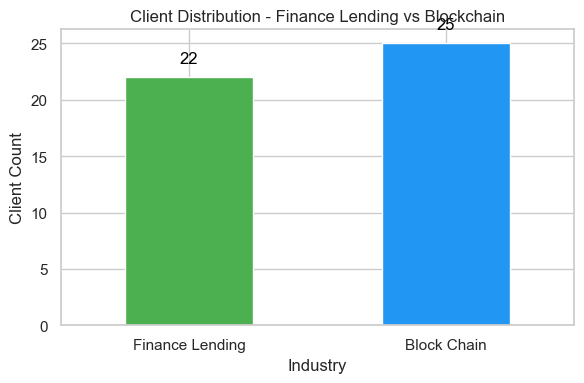

In [49]:
# Bar Chart
plt.figure(figsize=(6, 4))
client_distribution = pd.Series({
    'Finance Lending': finance_clients_count,
    'Block Chain': blockchain_clients_count
})
ax = client_distribution.plot(kind='bar', color=['#4CAF50', '#2196F3'])
ax.set_title("Client Distribution - Finance Lending vs Blockchain")
ax.set_ylabel('Client Count')
ax.set_xlabel('Industry')
ax.set_xticklabels(client_distribution.index, rotation=0)
ax.bar_label(ax.containers[0], label_type='edge', color='black', fontsize=12, padding=8)
plt.tight_layout()
plt.show()


## 📊 Q2: Renewal Rate by Industry
#### We aim to analyze which **industry** has the **highest subscription renewal rate**. This helps identify which sectors are more likely to maintain long-term engagements with the service.

### Explanation
#### merged_subscription_df: Contains both client industry info and subscription data.

### Step-by-step breakdown:

#### groupby('industry')['renewed'].mean():
#### Groups data by industry.
#### Calculates the mean of the renewed column, where True = 1 and False = 0.
#### Result: average renewal rate per industry.
#### .reset_index(): Converts the groupby result into a DataFrame.
#### idxmax(): Finds the index of the industry with the highest renewal rate.
#### loc[...]: Retrieves the full row of that top-performing industry.e.

In [52]:
# 📊 Q2: Renewal Rate by Industry
industry_renewal_rates = merged_subscription_df.groupby('industry')['renewed'].mean().reset_index()
industry_with_max_renewal = industry_renewal_rates.loc[industry_renewal_rates['renewed'].idxmax()]

print("\n📌 Q2: Highest Renewal Rate")
print(industry_with_max_renewal)


📌 Q2: Highest Renewal Rate
industry      Gaming
renewed     0.727273
Name: 3, dtype: object


## 🌡️ Q2 Visualization: Heatmap of Renewal Rates by Industry
#### To better understand renewal performance across industries, we visualize the **average renewal rate** using a **heatmap**. This helps quickly identify which industries have higher or lower engagement levels.

## Explanation
### Pivot Table:
#### pivot_table(values='renewed', columns='industry') restructures the data for heatmap input.
### Heatmap:
#### annot=True: Displays values on the heatmap.
#### fmt=".2f": Shows values up to 2 decimal places.
#### cmap='YlGnBu': Uses a Yellow-Green-Blue color gradient.
#### annot_kws={"color": "red", "weight": "bold"}: Colors the text annotations in red for emphasis.
#### cbar_kws: Adds a color bar with label Renewal Rate (%).
### Highlight Max:
#### Identifies the industry with the highest renewal rate.
#### Uses patches.Rectangle to highlight the cell with a red border.
#### plt.tight_layout(): Ensures the layout fits nicely without overlapping labels.
### Output Description
#### The chart will display:
#### Industry names on the x-axis.
#### Their corresponding renewal rates as annotated values.
#### A red border around the cell with the highest renewal rate for quick visibility.

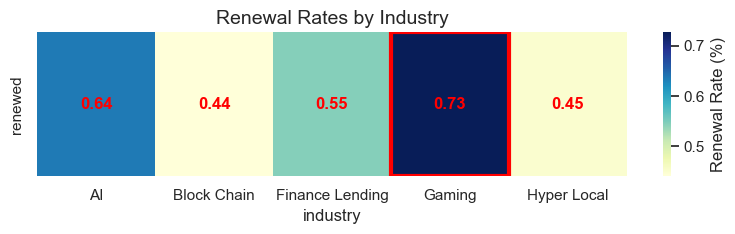

In [55]:
plt.figure(figsize=(8, 2.5))

# Create pivot table
pivot_data = industry_renewal_rates.pivot_table(values='renewed', columns='industry')

# Plot heatmap with custom text color (e.g., red)
ax = sns.heatmap(pivot_data,
                 annot=True,
                 fmt=".2f",
                 cmap='YlGnBu',
                 annot_kws={"color": "red", "weight": "bold"},  # Change text color to red
                 cbar_kws={'label': 'Renewal Rate (%)'})

# Set title and remove y-axis label
ax.set_title("Renewal Rates by Industry", fontsize=14)
ax.set_ylabel("")

# 🔍 Highlight max value cell using index
max_val = industry_with_max_renewal['renewed']
max_col = list(pivot_data.columns).index(industry_with_max_renewal['industry'])

# Add a rectangle patch to highlight the max value
highlight = patches.Rectangle((max_col, 0), 1, 1, fill=False, edgecolor='red', linewidth=3)
ax.add_patch(highlight)

plt.tight_layout()
plt.show()

## 📊 Q3: Average Inflation Rate During Renewals
#### In this analysis, we calculate the **average inflation rate at the time of client subscription renewals**. This helps us assess if economic factors like inflation correlate with renewal behavior.
## Explanation
### Step 1: Filter Renewals
#### renewed_subscriptions = subscription_df[subscription_df['renewed'] == True]
#### → Selects only those subscriptions where the client actually renewed.
### Step 2: Define a Function to Match Inflation Rates
#### The function get_inflation_for_date(date):
#### Looks up a matching record from financial_df where the start_date ≤ date ≤ end_date.
#### Returns the inflation_rate during that time period.
### Step 3: Apply Function Across Renewal Dates
#### Using .apply(...), the function assigns an inflation rate to each renewal based on its end_date.
### Step 4: Calculate the Average
#### .mean() computes the average inflation experienced during all renewals.

In [57]:
# 📊 Q3: Average Inflation Rate During Renewals
renewed_subscriptions = subscription_df[subscription_df['renewed'] == True].copy()

# Match inflation based on renewal date
def get_inflation_for_date(date):
    match = financial_df[(financial_df['start_date'] <= date) & (financial_df['end_date'] >= date)]
    return match.iloc[0]['inflation_rate'] if not match.empty else np.nan

renewed_subscriptions['inflation_rate'] = renewed_subscriptions['end_date'].apply(get_inflation_for_date)
avg_inflation_at_renewal = renewed_subscriptions['inflation_rate'].mean()

print("\n📌 Q3: Average Inflation Rate During Renewals")
print(f"Average Inflation Rate: {avg_inflation_at_renewal:.2f}%")



📌 Q3: Average Inflation Rate During Renewals
Average Inflation Rate: 4.31%


## 📈 Q3 Visualization: Histogram of Inflation Rates During Renewals
#### To better understand the distribution of inflation rates experienced during subscription renewals, we visualize it using a **histogram**. This helps identify whether clients tend to renew more during low, moderate, or high inflation periods.

## Explanation
#### sns.histplot(...): Creates a histogram showing how many clients renewed under different inflation rates.
#### bins=10: Divides data into 10 intervals (bars).
#### kde=True: Adds a kernel density estimation curve to visualize the probability distribution.
#### color="#FF7043": Sets bar color to a visually appealing orange shade.
#### plt.axvline(...):
#### Adds a blue dashed vertical line at the average inflation rate.
#### Helps contextualize where most renewals occurred relative to the average.
#### plt.tight_layout(): Ensures that all elements fit neatly inside the figure boundary.

## Output Description
#### X-axis: Inflation Rate (%)
#### Y-axis: Number of Renewals
#### Blue Dashed Line: Marks the average inflation rate during renewals.
## This chart helps us see:
#### Whether most renewals happen at lower or higher inflation.
#### How inflation volatility might affect client decisions.

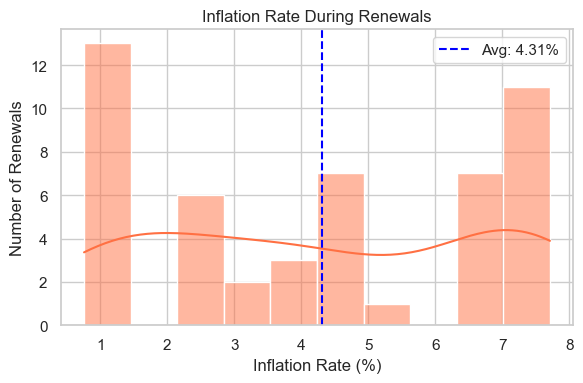

In [60]:
# Histogram
plt.figure(figsize=(6, 4))
ax = sns.histplot(renewed_subscriptions['inflation_rate'].dropna(), bins=10, kde=True, color="#FF7043")
ax.set_title("Inflation Rate During Renewals")
ax.set_xlabel("Inflation Rate (%)")
ax.set_ylabel("Number of Renewals")

# Mark average
plt.axvline(avg_inflation_at_renewal, color='blue', linestyle='--', label=f'Avg: {avg_inflation_at_renewal:.2f}%')
plt.legend()
plt.tight_layout()
plt.show()


## 💳 Q4: Median Amount Paid Per Year by Payment Method
#### To understand how client **payment behavior** evolves over time, we analyze the **median amount paid** each year grouped by **payment method**. This reveals how preferred methods differ in typical transaction size.

## Explanation
#### payment_df['payment_year'] = ...
#### → Extracts the year from each payment date for grouping purposes.

#### groupby(['payment_method', 'payment_year'])
#### → Groups data by both payment method (e.g., Credit Card, PayPal, etc.) and year.

#### ['amount_paid'].median()
#### → Calculates the median (not mean) amount paid, which is less sensitive to outliers and better reflects typical payments.

#### .reset_index()
#### → Converts the result into a DataFrame for easy display and further visualization.




In [63]:
payment_df['payment_year'] = payment_df['payment_date'].dt.year
median_payment_by_method_year = (
    payment_df.groupby(['payment_method', 'payment_year'])['amount_paid'].median().reset_index()
)

print("\nMedian Amount Paid Per Year by Payment Method:")
print(median_payment_by_method_year)



Median Amount Paid Per Year by Payment Method:
   payment_method  payment_year  amount_paid
0   Bank Transfer          2018       281.65
1   Bank Transfer          2019       184.20
2   Bank Transfer          2020       225.10
3   Bank Transfer          2021       255.30
4   Bank Transfer          2022       196.50
5           Check          2018       216.60
6           Check          2019       410.20
7           Check          2020       413.10
8           Check          2021       435.10
9           Check          2022       275.50
10    Credit Card          2018       229.15
11    Credit Card          2019       401.90
12    Credit Card          2020       285.25
13    Credit Card          2021       208.70
14    Credit Card          2022       326.20


## 📊 Q4 Visualization: Median Amount Paid per Year by Payment Method
#### To analyze how the median amount paid varies over the years for different payment methods, we visualize the data using a **line plot**. This allows us to identify trends, patterns, and differences in payment behavior.

## Explanation
#### sns.lineplot(...): Creates a line plot showing the median amount paid each year, broken down by payment method.
#### x='payment_year': Plots the payment years on the x-axis.
#### y='amount_paid': Plots the median amount paid on the y-axis.
#### hue='payment_method': Differentiates the data by payment method using distinct colors.
#### marker='o': Adds markers on each data point to make trends clearer.
#### ax.set_title(...): Adds a title to the plot to explain what the graph is depicting.
#### ax.set_xlabel(...): Labels the x-axis as the "Year".
#### ax.set_ylabel(...): Labels the y-axis as the "Median Amount Paid (₹)".
#### ax.grid(True): Displays a grid to improve readability of the plot.
#### plt.tight_layout(): Adjusts the layout to avoid overlap or clipping of elements.
#### plt.subplots_adjust(...): Further adjusts the plot layout to fine-tune spacing.

## Output Description
#### X-axis: Year (payment year)
#### Y-axis: Median Amount Paid (₹)
#### Multiple Lines: Each line represents a different payment method, showing how the median payment amount changes across years.
#### Markers: Data points are represented with markers for better visibility.
#### Grid: The plot includes a grid to help in reading the values clearly.
#### Title: "Median Amount Paid per Year by Payment Method"

## This chart helps us see:
#### How different payment methods perform over the years.
#### Whether certain payment methods are preferred more during certain periods.
#### The overall trend in median payments over time for each payment method.


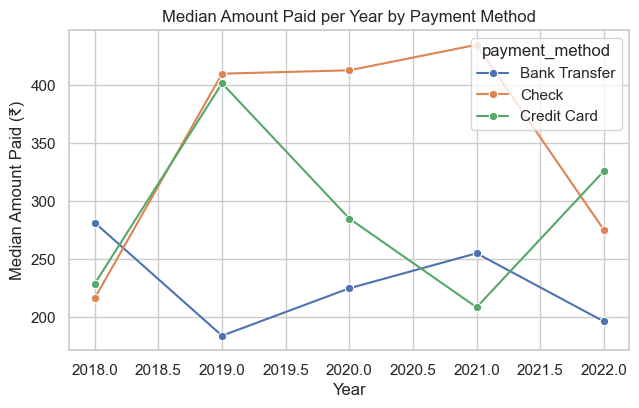

In [65]:
plt.figure(figsize=(7, 4))
ax = sns.lineplot(data=median_payment_by_method_year,
                  x='payment_year',
                  y='amount_paid',
                  hue='payment_method',
                  marker='o')
ax.set_title("Median Amount Paid per Year by Payment Method")
ax.set_ylabel("Median Amount Paid (₹)")
ax.set_xlabel("Year")
ax.grid(True)

# Tight layout to remove unnecessary space
plt.tight_layout()

# Optionally, adjust the spacing further
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9)

plt.show()

## 🔥 Heatmap of Industry Renewal Rates
#### To explore the renewal rates across different industries, we create a **heatmap** that visualizes how renewal rates vary for each industry over time.

## Explanation
#### industry_renewal_rates.pivot_table(...): Creates a pivot table where:
- **values='renewed'**: The data for renewal rates (whether clients renewed or not).
- **columns='industry'**: Industries are represented as columns, and each industry has its own column in the pivot table.
#### The resulting **pivot table** allows us to view renewal rates across industries, where each cell represents the renewal status for a specific industry.

## Output Description
#### Rows: Each row represents a different time period (or other factors, depending on how the pivot table is structured).
#### Columns: Different industries.
#### Values: The renewal rates for each industry over time or by otss industries.


In [67]:
# Create the pivot table for the heatmap
industry_renewal_pivot = industry_renewal_rates.pivot_table(values='renewed', columns='industry')


## 📊 Finance & Subscription Analytics Dashboard
#### This dashboard visualizes various key metrics, providing insights into client distribution, renewal rates, inflation rates, and payment behavior across industries.

### Explanation
### sns.set(...):
#### Sets the style of the plots to **whitegrid** for a clean background with gridlines.
#### Defines the **color palette** to use throughout the plots as "deep" for better visibility and aesthetic appeal.
### GridSpec(2, 2): 
#### Creates a **2x2 grid layout** for the dashboard, allowing us to place four different visualizations in a structured manner.

### Q1: Bar Chart - Client Distribution
#### **Plot**: A bar chart displaying the distribution of clients across the **Finance Lending** and **Blockchain** industries.
#### **Customization**: Uses a **vibrant color palette** from Seaborn’s "Set2" for better contrast and visual appeal.
#### **Title and Labels**: Adds a bold title and labels for clarity, with **bar labels** showing the exact count of clients.

### Q2: Heatmap - Renewal Rates by Industry
#### **Plot**: A **heatmap** to visualize the renewal rates across different industries.
#### **Customization**: Uses the **YlGnBu color map** for a smooth transition in colors representing renewal rates.
#### **Annotations**: Displays renewal rate percentages within each cell, with the **Gaming industry** (if present) being highlighted in **yellow** with a red border.
#### **Title**: Bold and clear title to describe the chart.

### Q3: Histogram - Inflation Rate During Renewals
#### - **Plot**: A **histogram** showing the distribution of **inflation rates** during subscription renewals.
#### - **Customization**: Adds a **Kernel Density Estimate (KDE)** curve to visualize the distribution more smoothly.
#### - **Vertical Line**: A **blue dashed line** marks the average inflation rate during renewals.
#### - **Legend**: A legend is added to label the average inflation rate.

### Q4: Line Plot - Median Amount Paid per Year by Payment Method
#### - **Plot**: A **line plot** showing the **median amount paid** per year, broken down by **payment method**.
#### - **Customization**: Uses the **Set2 color palette** for a cohesive color scheme. Markers are added to each data point for better visibility.
#### - **Grid**: A grid is enabled to make reading the plot easier.

### Main Title
#### - The **main title** "Finance & Subscription Analytics Dashboard" is placed above the grid layout for better clarity.

### Output Description
#### **Q1 Bar Chart**: Client distribution between Finance Lending and Blockchain industries.
#### **Q2 Heatmap**: Renewal rates by industry, with an emphasis on the Gaming industry if present.
#### **Q3 Histogram**: Distribution of inflation rates during renewals, with an average inflation line.
#### **Q4 Line Plot**: Trends in median amount paid over the years, segmented by payment method.

### This dashboard helps us understand:
#### The distribution of clients across different industries.
#### How renewal rates vary across industries.
#### The relationship between inflation rates and subscription renewals.
#### Trends in payment behavior across different methods over the years.nt behavior across different methods over the years.


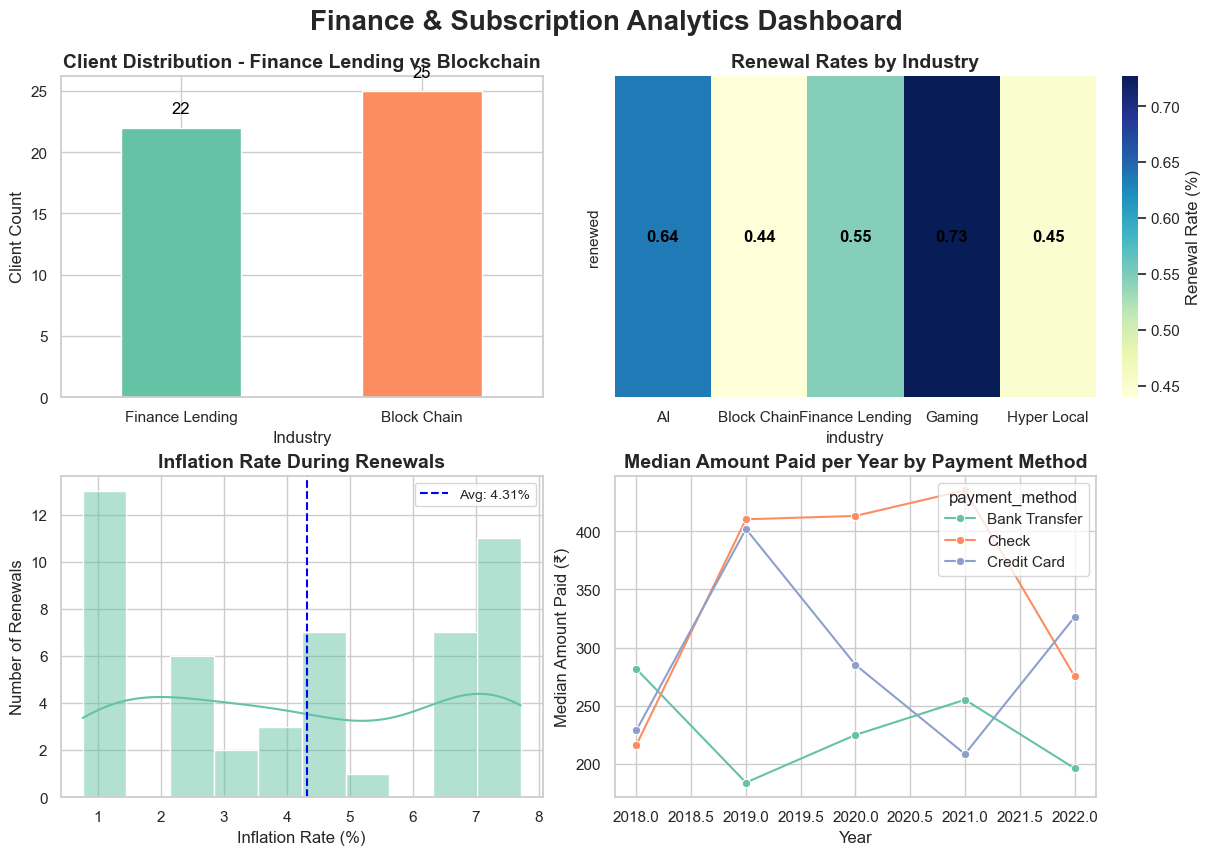

In [71]:
# Set the style and color palette
sns.set(style="whitegrid", palette="deep")

# Create the final dashboard with a grid layout
fig = plt.figure(constrained_layout=True, figsize=(12, 8))
grid = GridSpec(2, 2, figure=fig)

# Recreate the pivot table for the heatmap
industry_renewal_pivot = industry_renewal_rates.pivot_table(values='renewed', columns='industry')

# Q1 Bar Chart - Client Distribution
ax1 = fig.add_subplot(grid[0, 0])
client_distribution.plot(kind='bar', color=sns.color_palette("Set2", n_colors=2), ax=ax1)  # Vibrant color palette
ax1.set_title("Client Distribution - Finance Lending vs Blockchain", fontsize=14, fontweight='bold')
ax1.set_ylabel('Client Count', fontsize=12)
ax1.set_xlabel('Industry', fontsize=12)
ax1.set_xticklabels(client_distribution.index, rotation=0)
ax1.bar_label(ax1.containers[0], label_type='edge', color='black', fontsize=12, padding=8)

# Q2 Heatmap - Renewal Rates by Industry
ax2 = fig.add_subplot(grid[0, 1])
sns.heatmap(industry_renewal_pivot, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Renewal Rate (%)'}, ax=ax2, annot_kws={"size": 12, "weight": "bold", "color": "black"})
ax2.set_title("Renewal Rates by Industry", fontsize=14, fontweight='bold')

# Highlight "Gaming" industry if present
gaming_industry = 'Gaming'  # Replace with the actual name if it's different
if gaming_industry in industry_renewal_pivot.index:
    gaming_value = industry_renewal_pivot.loc[gaming_industry].max()
    for text in ax2.texts:
        if text.get_text() == str(round(gaming_value, 2)):
            text.set_bbox(dict(facecolor='yellow', edgecolor='red', boxstyle='round,pad=0.5'))
            text.set_color('black')  # Ensure the text is visible with the background color

# Q3 Histogram - Inflation Rate During Renewals
ax3 = fig.add_subplot(grid[1, 0])
sns.histplot(renewed_subscriptions['inflation_rate'].dropna(), bins=10, kde=True, color=sns.color_palette("Set2", n_colors=1)[0], ax=ax3)  # Vibrant color
ax3.set_title("Inflation Rate During Renewals", fontsize=14, fontweight='bold')
ax3.set_xlabel("Inflation Rate (%)", fontsize=12)
ax3.set_ylabel("Number of Renewals", fontsize=12)
ax3.axvline(avg_inflation_at_renewal, color='blue', linestyle='--', label=f'Avg: {avg_inflation_at_renewal:.2f}%')
ax3.legend(fontsize=10)

# Q4 Line Plot - Median Amount Paid per Year by Payment Method
ax4 = fig.add_subplot(grid[1, 1])
sns.lineplot(data=median_payment_by_method_year,
             x='payment_year',
             y='amount_paid',
             hue='payment_method',
             marker='o',
             ax=ax4,
             palette="Set2")  # Use the Set2 color palette for a vibrant look
ax4.set_title("Median Amount Paid per Year by Payment Method", fontsize=14, fontweight='bold')
ax4.set_ylabel("Median Amount Paid (₹)", fontsize=12)
ax4.set_xlabel("Year", fontsize=12)
ax4.grid(True)

# Main Title
plt.suptitle("Finance & Subscription Analytics Dashboard", fontsize=20, fontweight='bold', y=1.05)

# Show the plot
plt.show()
